In [67]:
import numpy as np
import matplotlib.pyplot as plt


Ea = 0.2
Gamma = 0.0
Nu = 0.5
T = 1/Nu
NS = 300
dt = T/NS

k = -1

def V(x):
    return k * x**2 / 2 + x**4 / 4


def F(x, p, t):
    return -Gamma * p - k * x - x**3 + Ea * np.cos(2*np.pi / T * t)


def H(x, p):
    return p**2 / 2 + V(x)
    

Xmax = 2
Pmax = 2

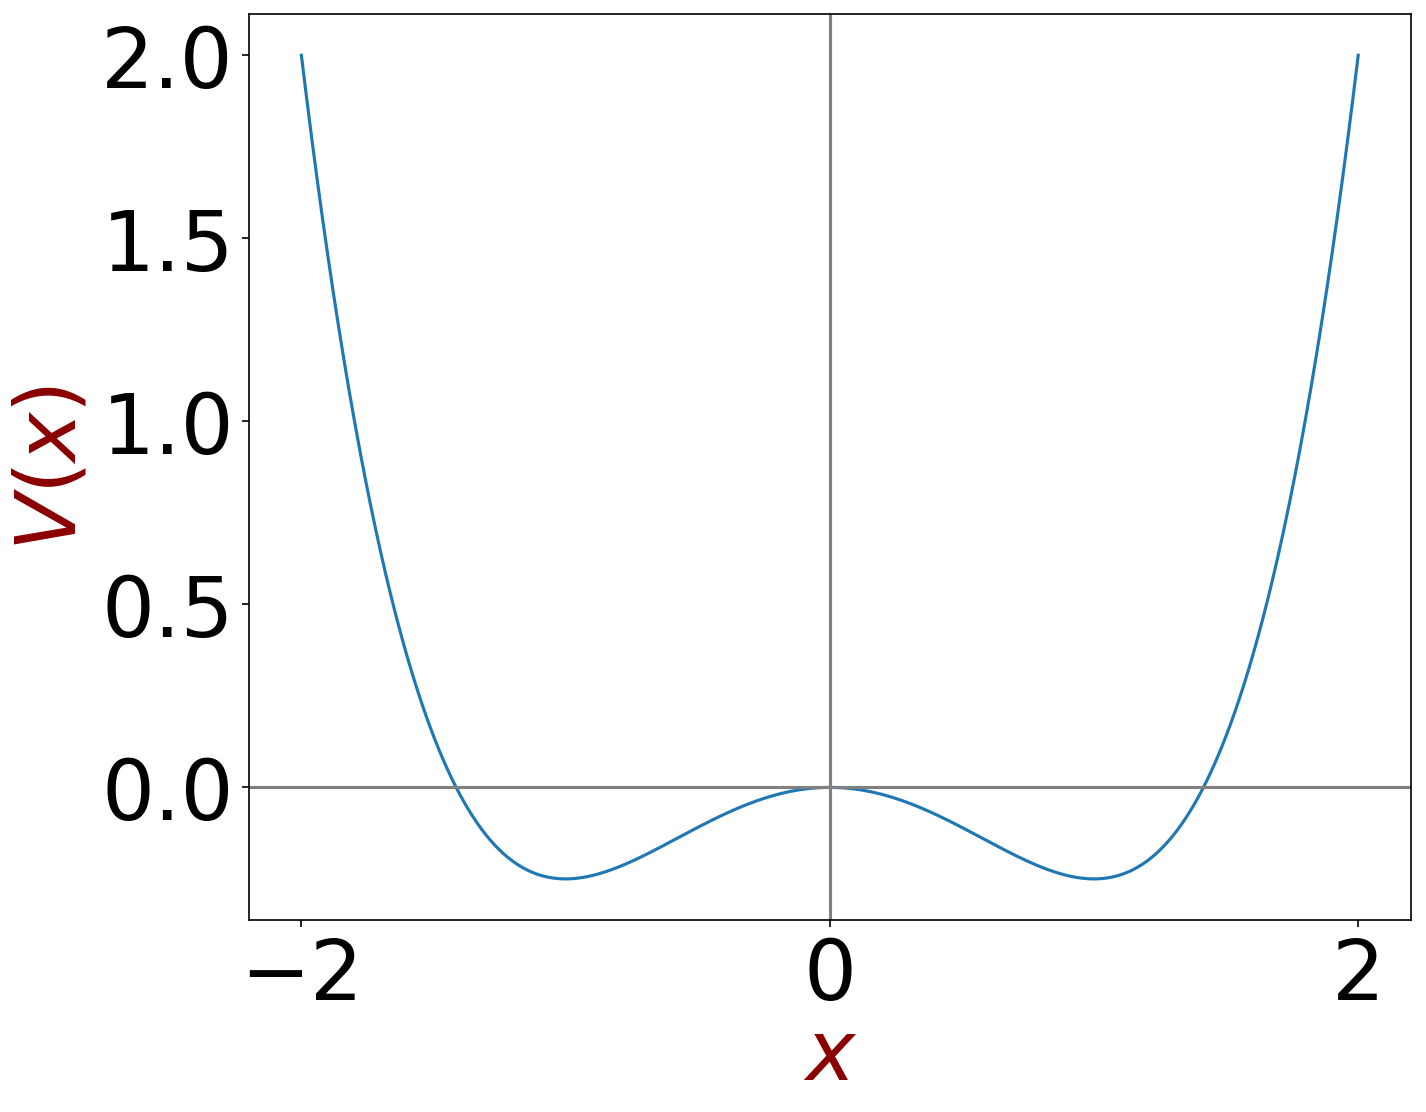

In [68]:
font = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }
lblsize = 25

x = np.linspace(-Xmax, Xmax, 1000)
p = np.linspace(-Pmax, Pmax, 1000)

plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$x$', fontdict=font)
plt.ylabel('$V(x)$', fontdict=font)
plt.tick_params(labelsize=40)
plt.plot(x, V(x))
plt.axhline(y=0, c='grey')
plt.axvline(x=0, c='grey')

<Figure size 1500x1200 with 0 Axes>

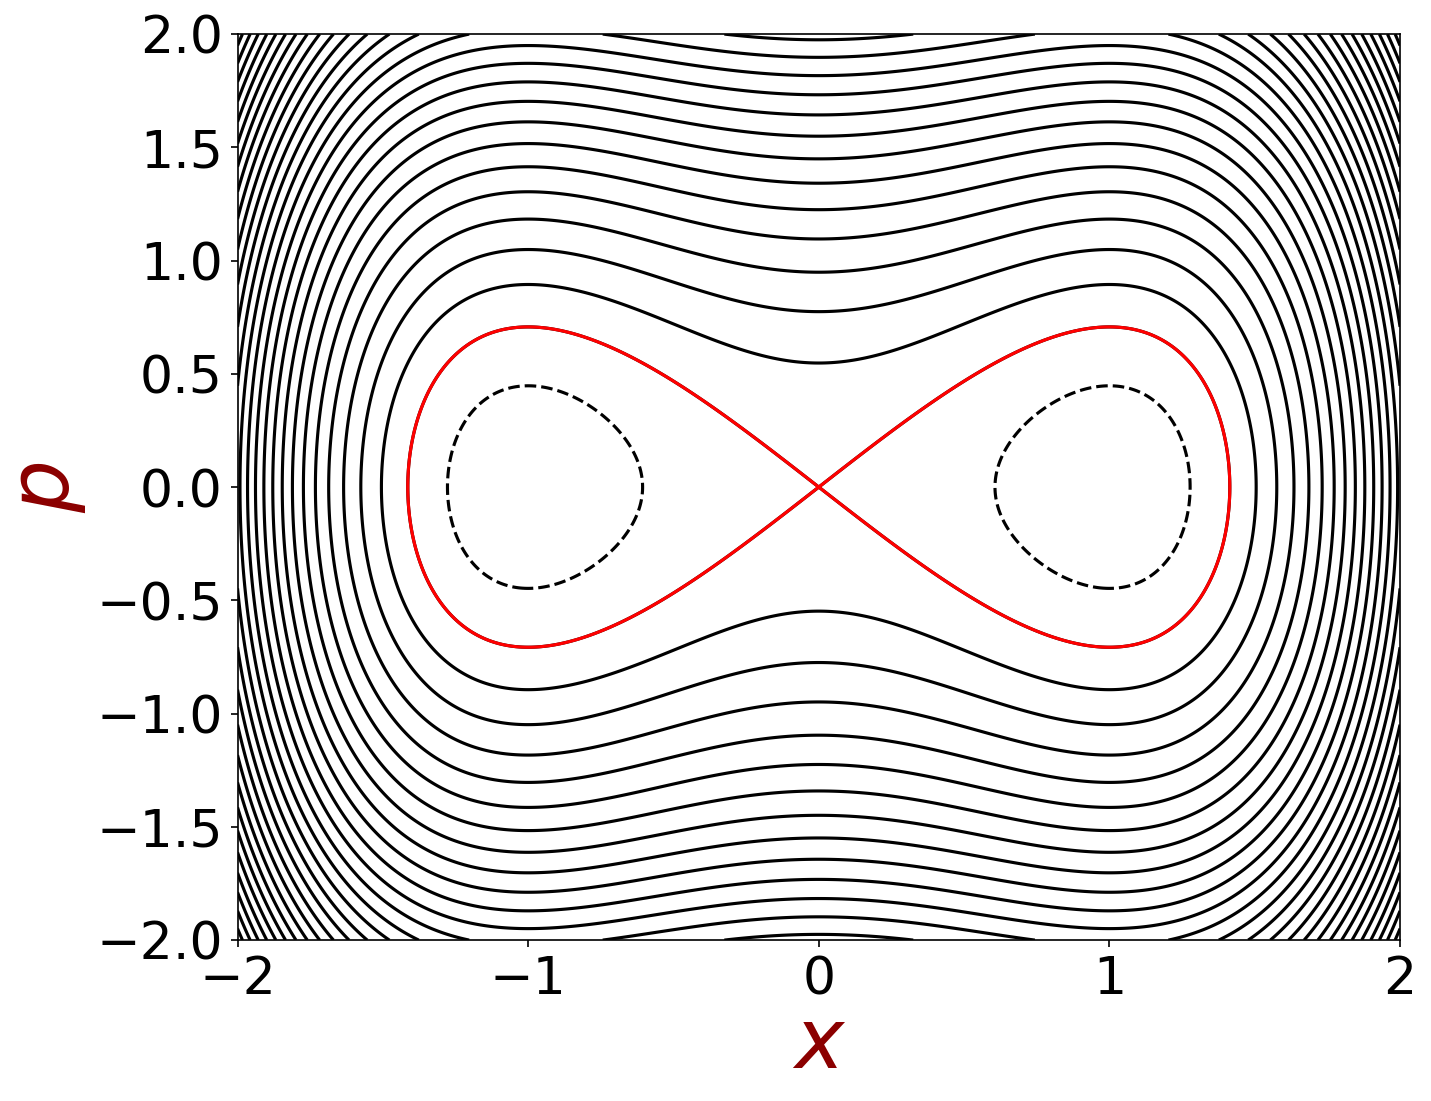

In [69]:
X, P = np.meshgrid(x, p)
Z = H(X, P)

plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$x$', fontdict=font)
plt.ylabel('$p$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.contour(X, P, Z, 30, colors='black')
d = np.ma.array(Z, mask=Z==0)
plt.contour(X, P, d, 0, colors='red')
plt.show()
plt.close()

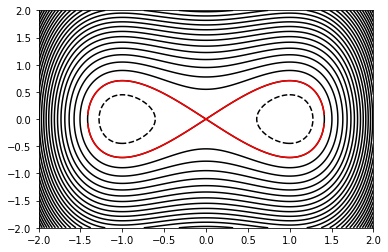

In [70]:
from sympy import *

a, b = symbols('a, b')

sol = solve(a**2/2 + V(b))

sep1 = sol[0][a]
sep2 = sol[1][a]
f1 = lambdify(b, sep1, "numpy")
f2 = lambdify(b, sep2, "numpy")
cX = [i + 0*1j for i in x]
cP1 = np.real([f1(x) for x in cX])
#print(cP)

separx1 = []
separy1 = []
for i in range(len(cX)):
    if cP1[i] > 1e-10 or cP1[i] < -1e-10:
        separx1.append(cX[i])
        separy1.append(cP1[i])
        
cP2 = np.real([f2(x) for x in cX])

separx2 = []
separy2 = []
for i in range(len(cX)):
    if cP2[i] > 1e-10 or cP2[i] < -1e-10:
        separx2.append(cX[i])
        separy2.append(cP2[i])

plt.plot(np.real(separx1), separy1, 'r')
plt.plot(np.real(separx2), separy2, 'r')
plt.contour(X, P, Z, 30, colors='black');
plt.show()
#plt.plot(x, f2(x))
#plt.contour(X, P, Z, 30, colors='black');
#plt.show()
#plt.contour(X, P, Z, 30, colors='black');

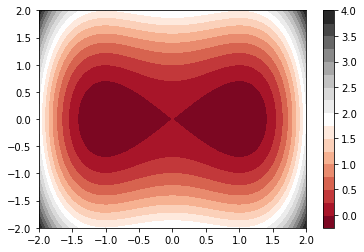

In [71]:
plt.contourf(X, P, Z, 20, cmap='RdGy')
plt.colorbar();

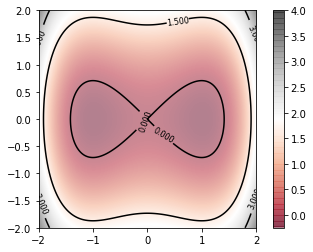

In [72]:
contours = plt.contour(X, P, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[-Xmax, Xmax, -Pmax, Pmax], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();



In [73]:
Nsteps = 10000

xn = 0.0
pn = 0.01

xt = [xn]
pt = [pn]

t = 0

for i in range(Nsteps):
   
    x = xn + dt * pn
    p = pn + dt * F(x, pn, t)
    t += dt
    xt.append(x)
    pt.append(p)
    xn = x
    pn = p

<Figure size 1500x1200 with 0 Axes>

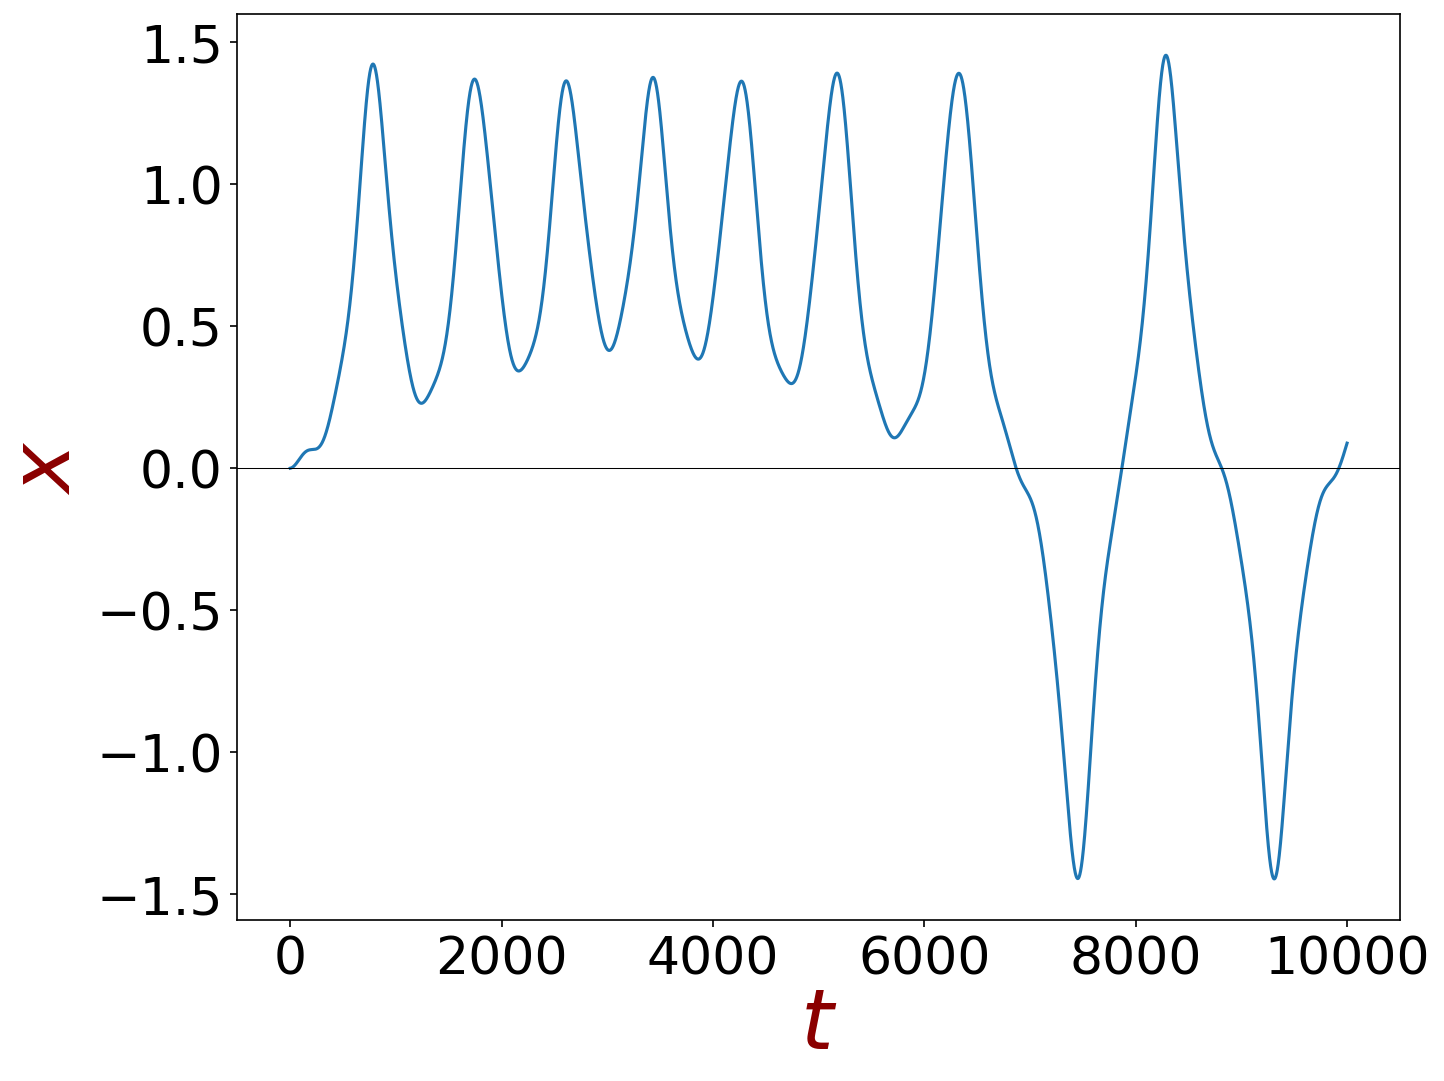

<Figure size 1500x1200 with 0 Axes>

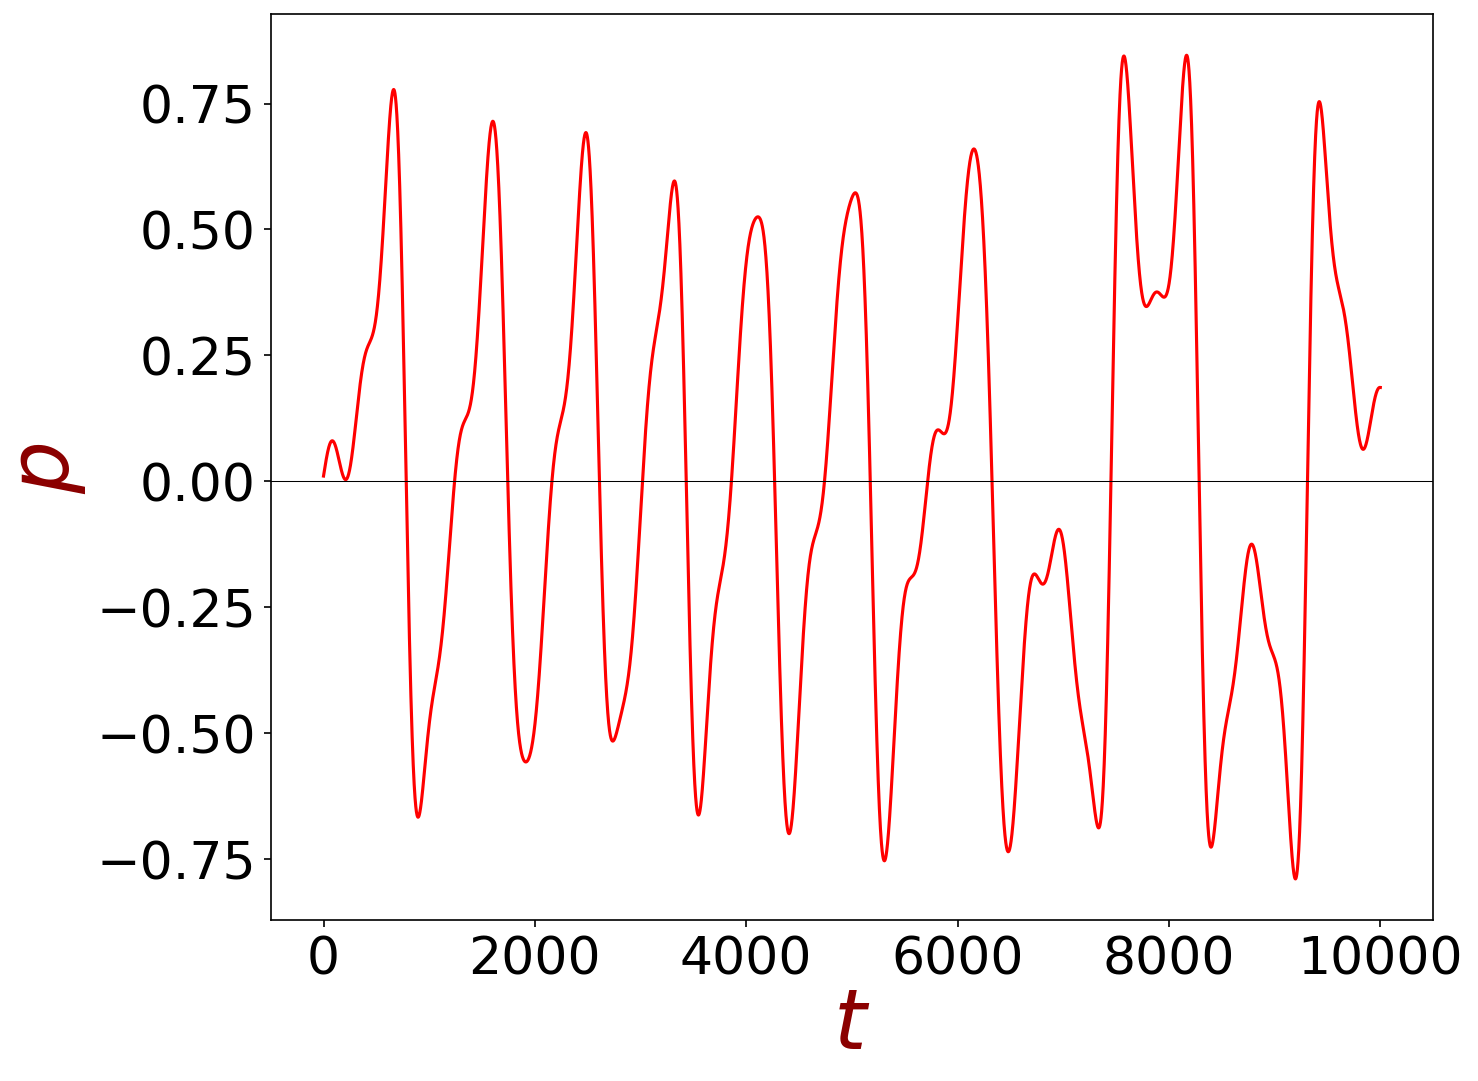

<Figure size 1500x1200 with 0 Axes>

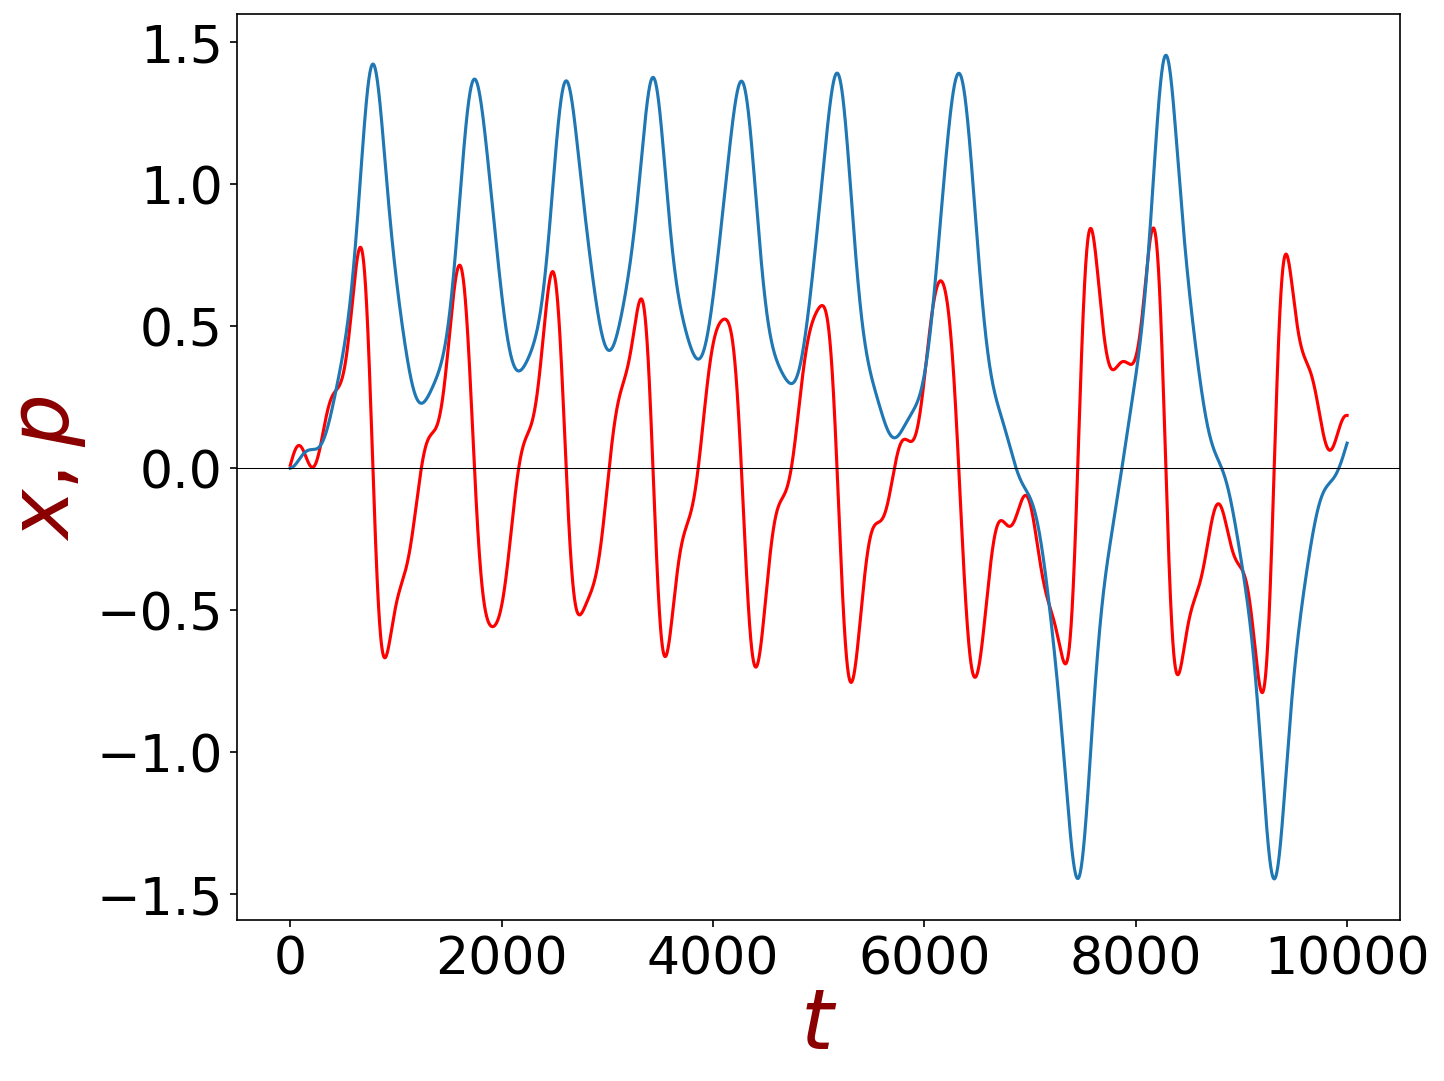

In [74]:
plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$x$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.plot(xt)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.show()

plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$p$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.plot(pt, 'r')
plt.axhline(y=0, color='k', linewidth=0.5)
plt.show()

plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$x, p$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.plot(pt, 'r')
plt.plot(xt)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.show()

<Figure size 1500x1200 with 0 Axes>

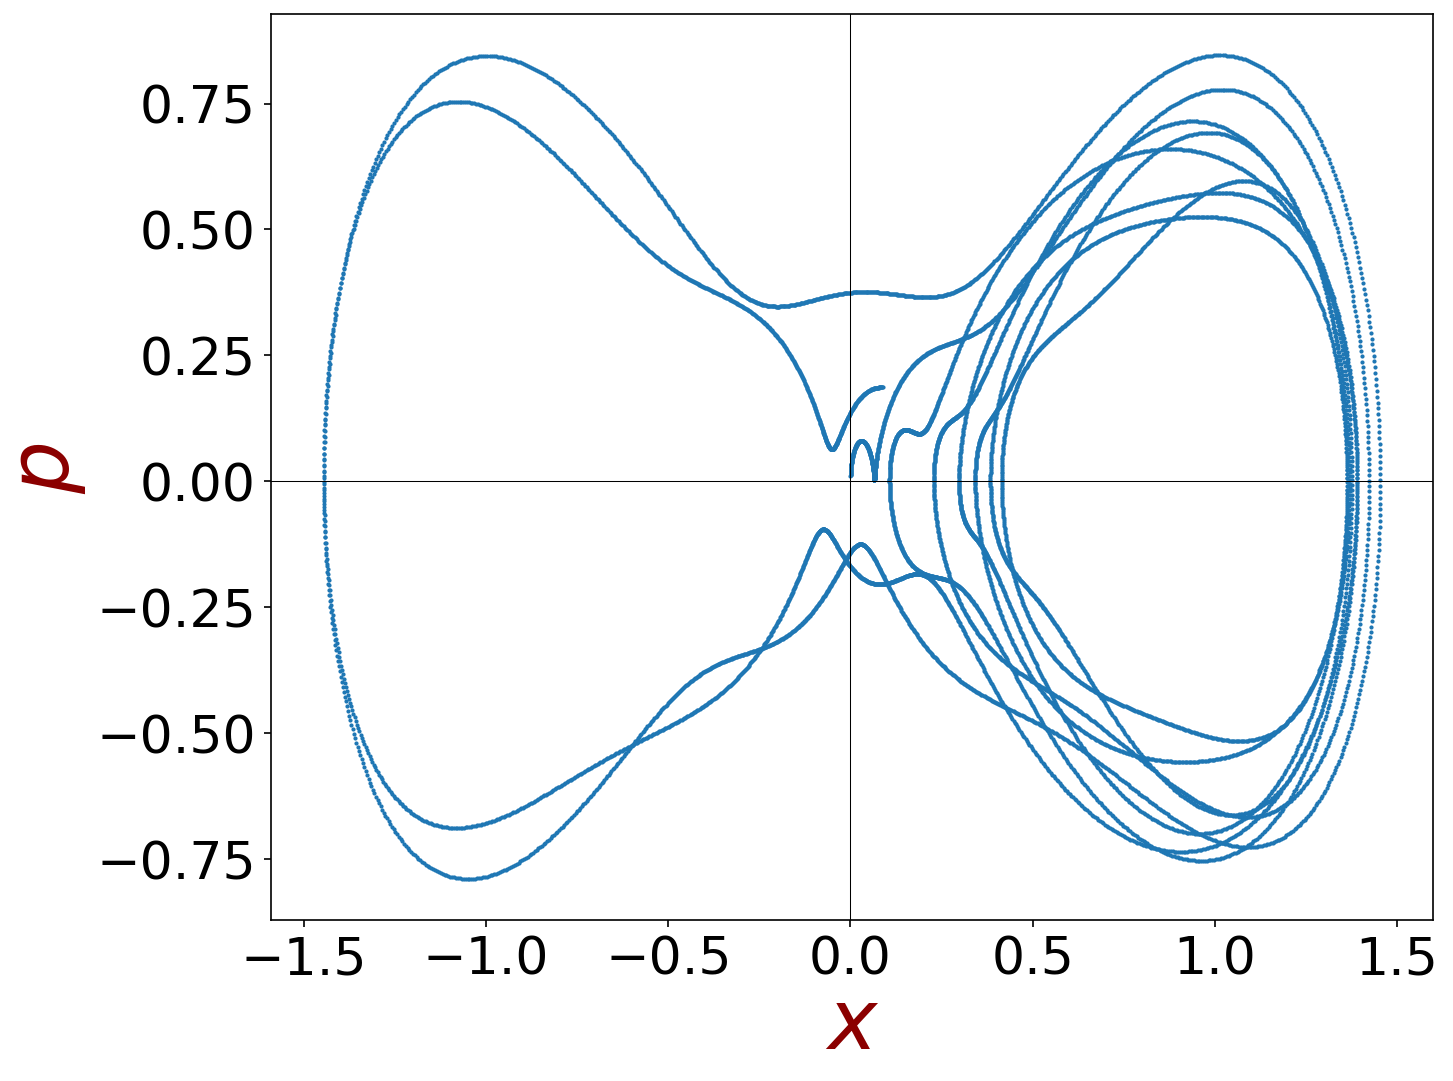

In [75]:
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$x$', fontdict=font)
plt.ylabel('$p$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.scatter(xt,pt, s=1)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

In [76]:
Np = 5000

xn = 0.0
pn = 0.01

xp = [xn]
pp = [pn]

for n in range(1, Np):
    
    tn = T * (n - 1)
    t = tn
    for j in range(NS):
        
        x = xn + dt * pn
        p = pn + dt * F(x, pn, t)
        t += dt
        xn = x
        pn = p
        
    xp.append(xn)
    pp.append(pn)

<Figure size 1500x1200 with 0 Axes>

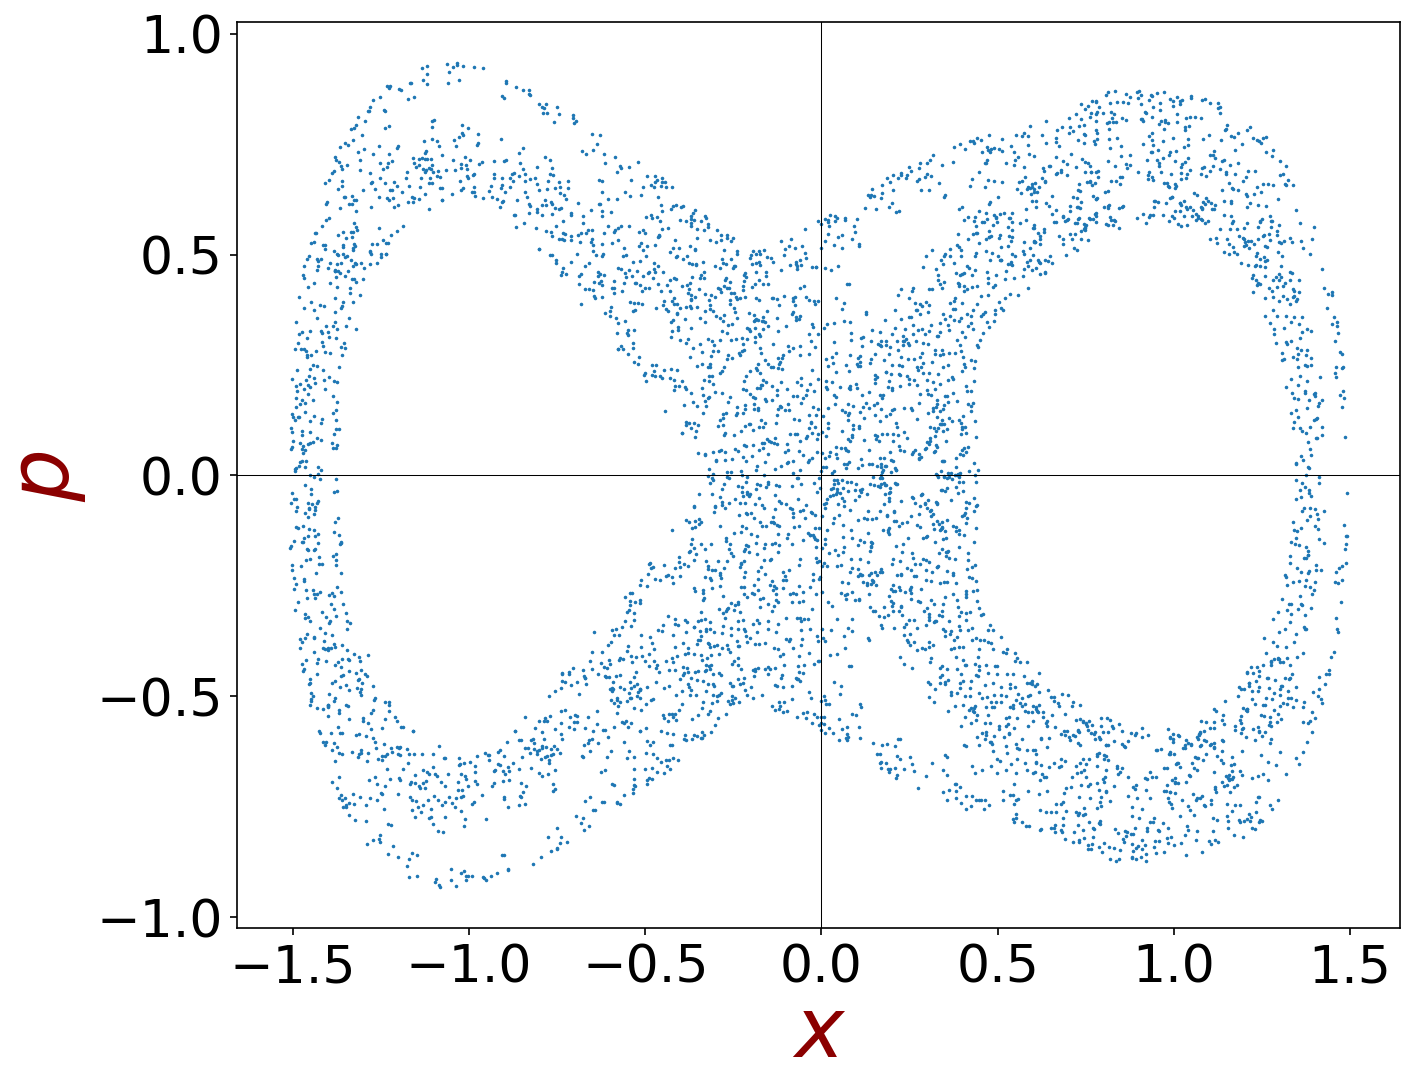

In [77]:
plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$x$', fontdict=font)
plt.ylabel('$p$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.scatter(xp, pp, s=0.5)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

In [49]:
Delta = 1e-7
xn = 0.0 - Delta
pn = 0.01

xtv = [xn]
ptv = [pn]

t = 0

for n in range(Nsteps):
        
    x = xn + dt * pn
    p = pn + dt * F(x, pn, t)
    t += dt
    xtv.append(x)
    ptv.append(p)
    xn = x
    pn = p

<Figure size 1500x1200 with 0 Axes>

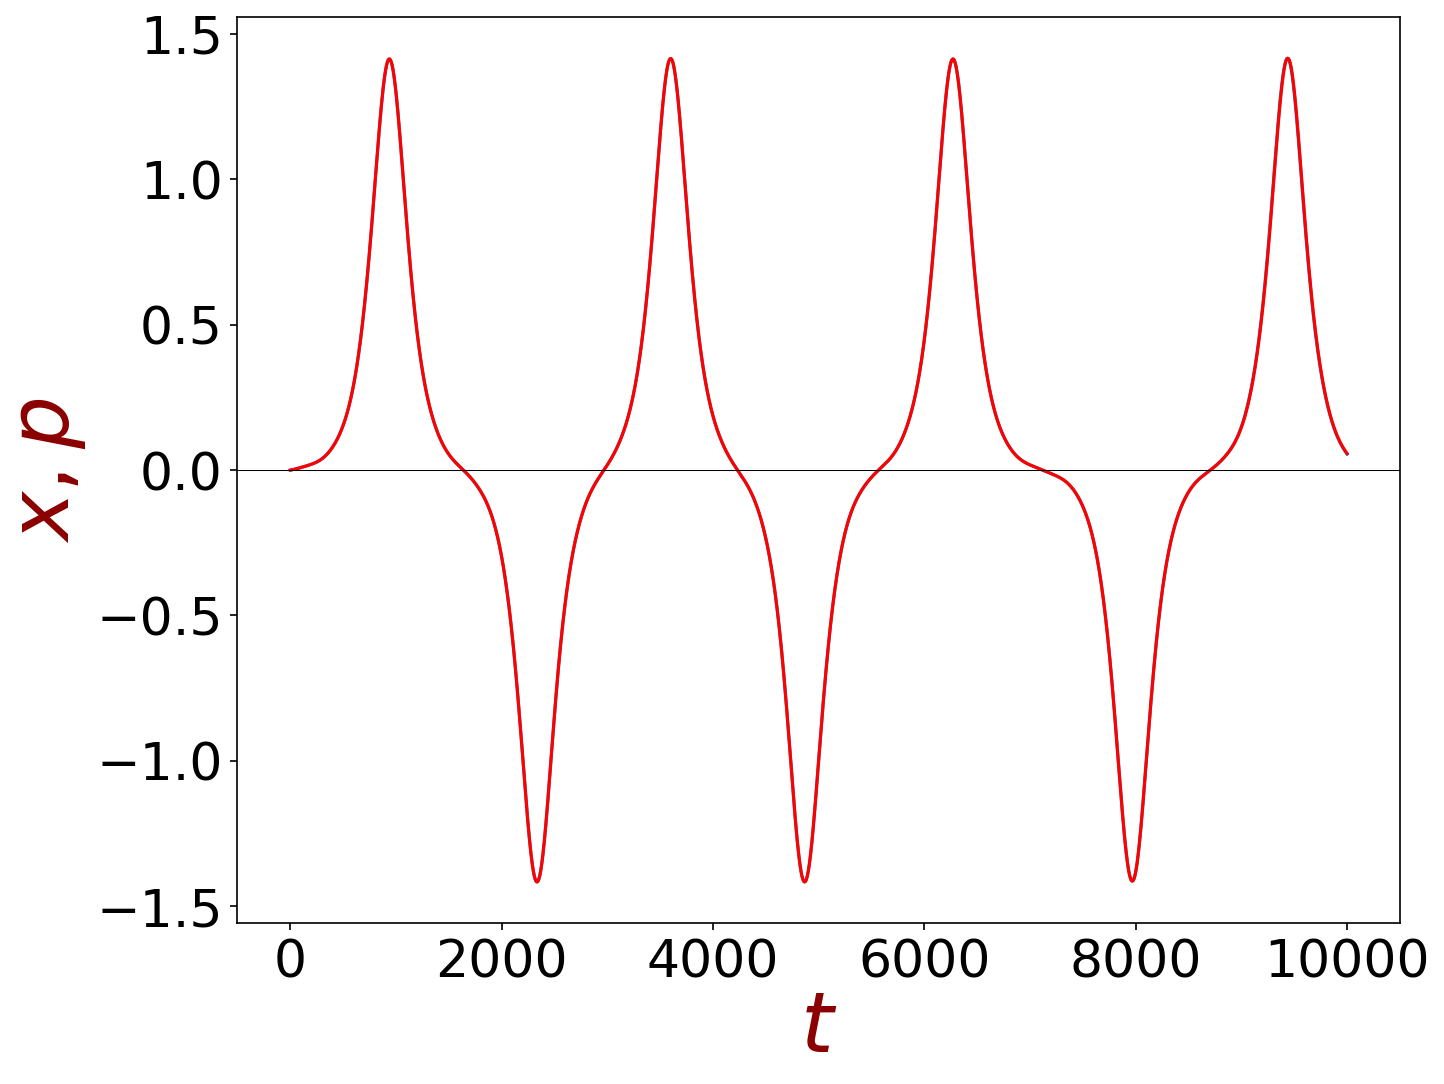

In [50]:
plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$x, p$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.plot(xt)
plt.plot(xtv, 'r')
plt.axhline(y=0, color='k', linewidth=0.5)
plt.show()

<Figure size 1500x1200 with 0 Axes>

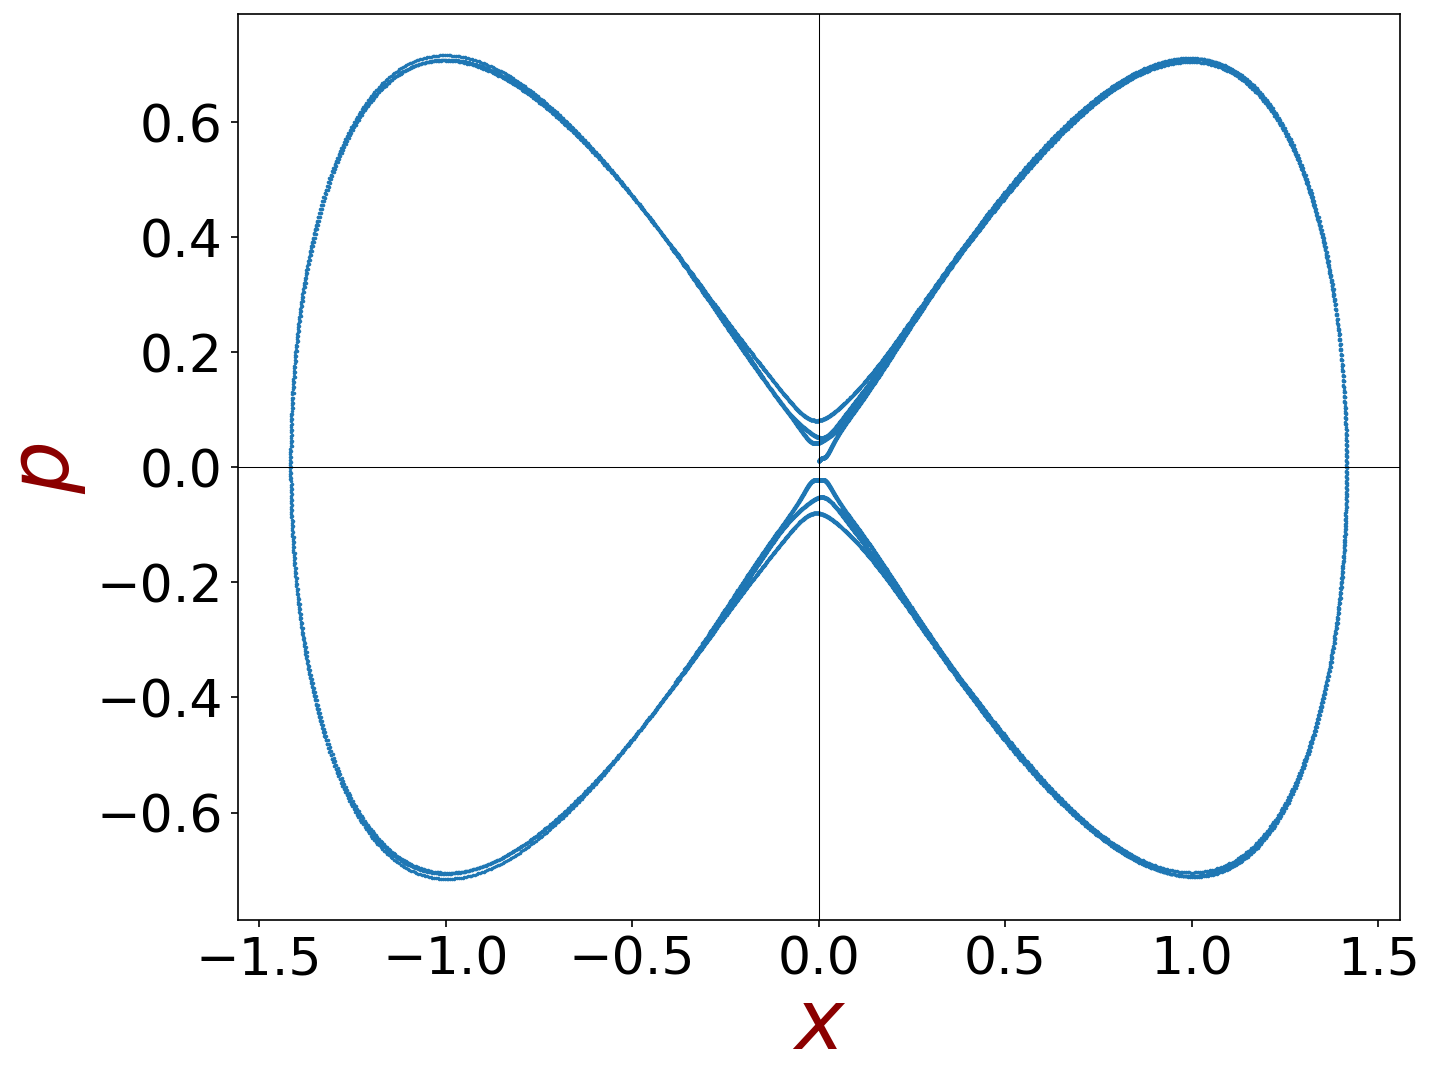

In [51]:
plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$x$', fontdict=font)
plt.ylabel('$p$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.scatter(xtv, ptv, s=0.5)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

<Figure size 1500x1200 with 0 Axes>

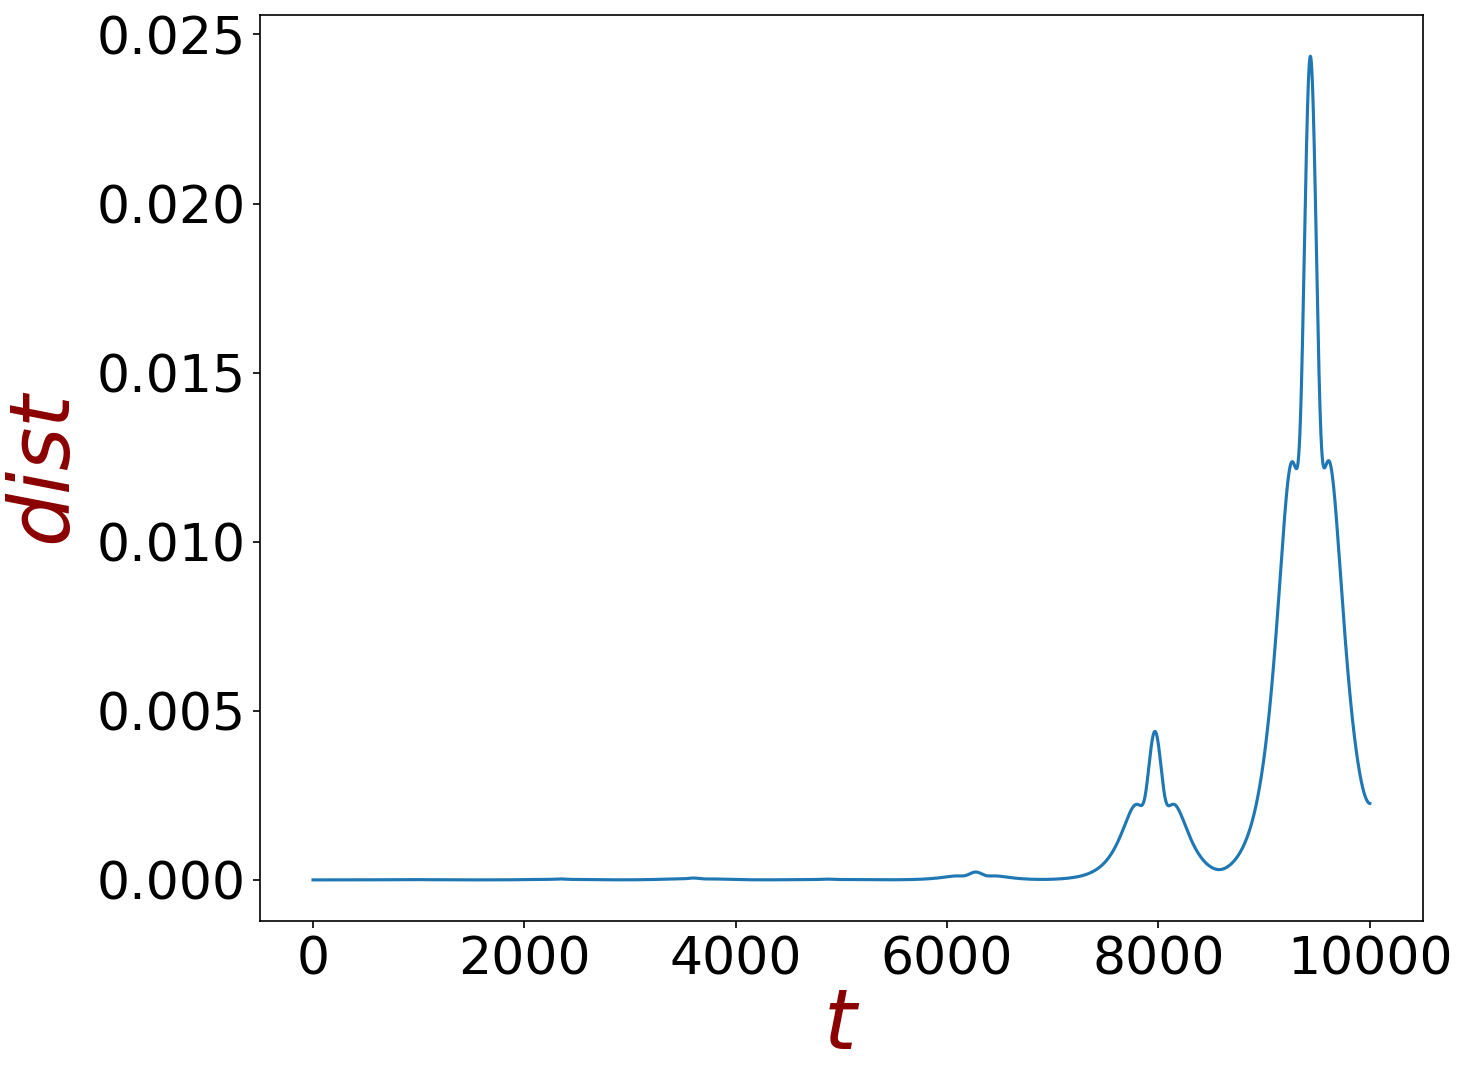

<Figure size 1500x1200 with 0 Axes>

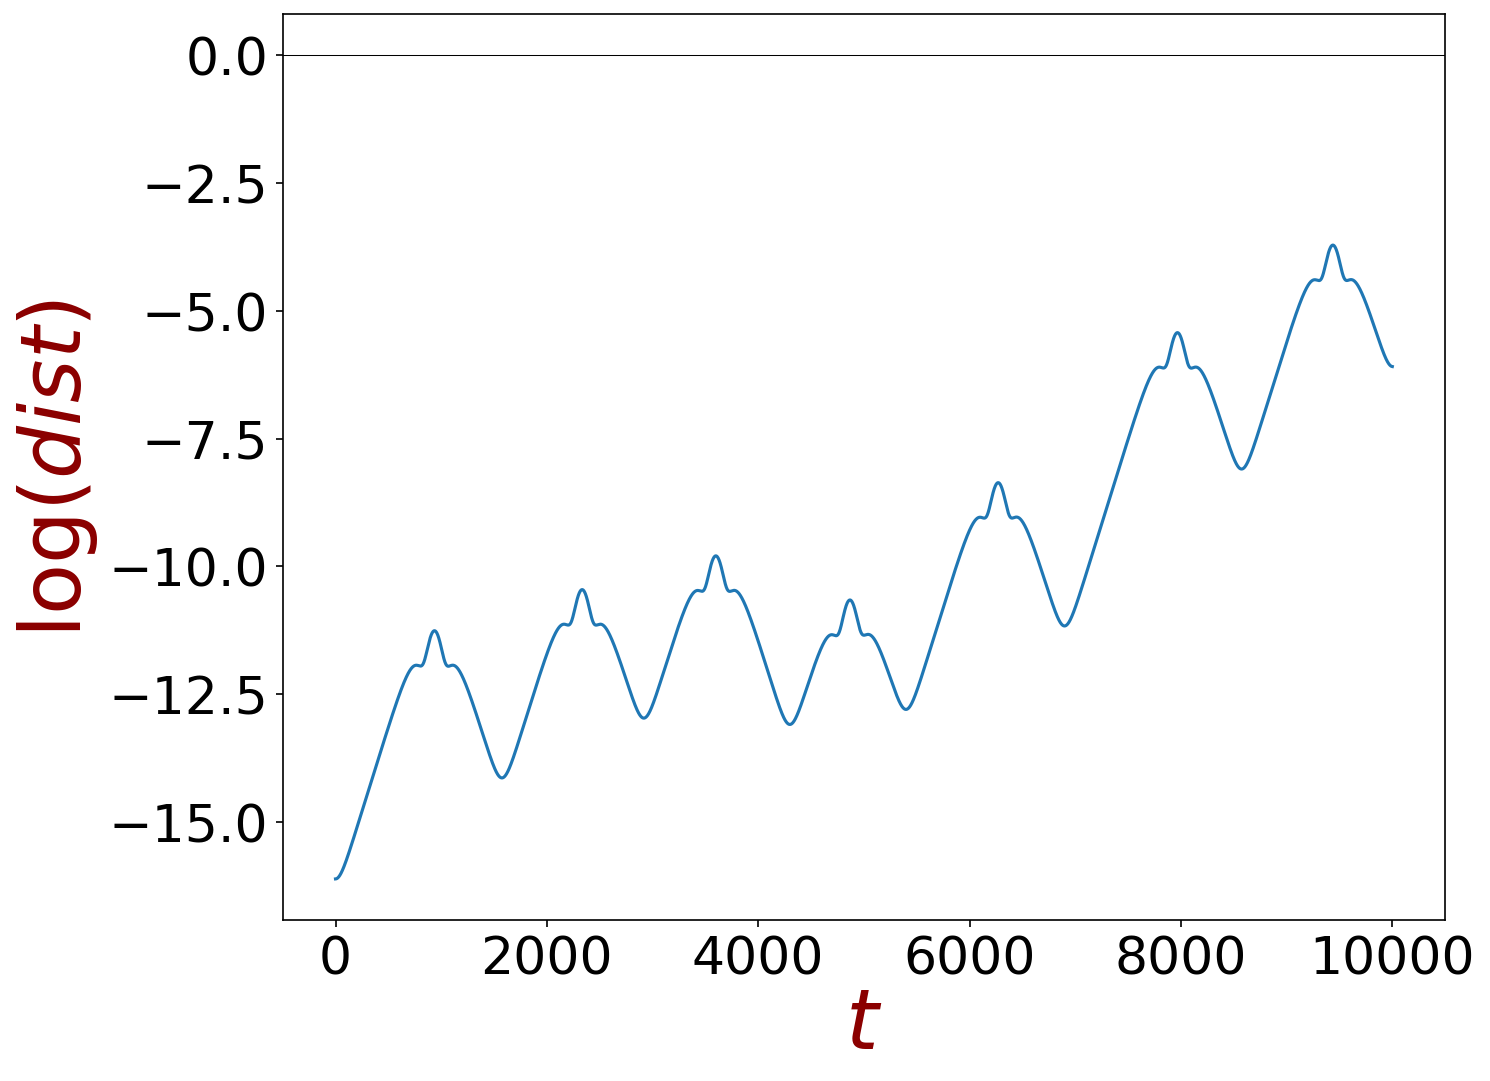

In [52]:
dx = [xtt - xttv for xtt, xttv in zip(xt, xtv)]
dp = [ptt - pttv for ptt, pttv in zip(pt, ptv)]

Dist = [np.sqrt(dx[i]**2 + dp[i]**2) for i in range(len(dx))]

LogDist = np.log(Dist)

plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$dist$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.plot(Dist)
plt.show()
plt.close()

plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$\log(dist)$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.plot(LogDist)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.show()

In [57]:
print(LogDist[-1]/Nsteps)

-0.0006091622966358544


<Figure size 1500x1200 with 0 Axes>

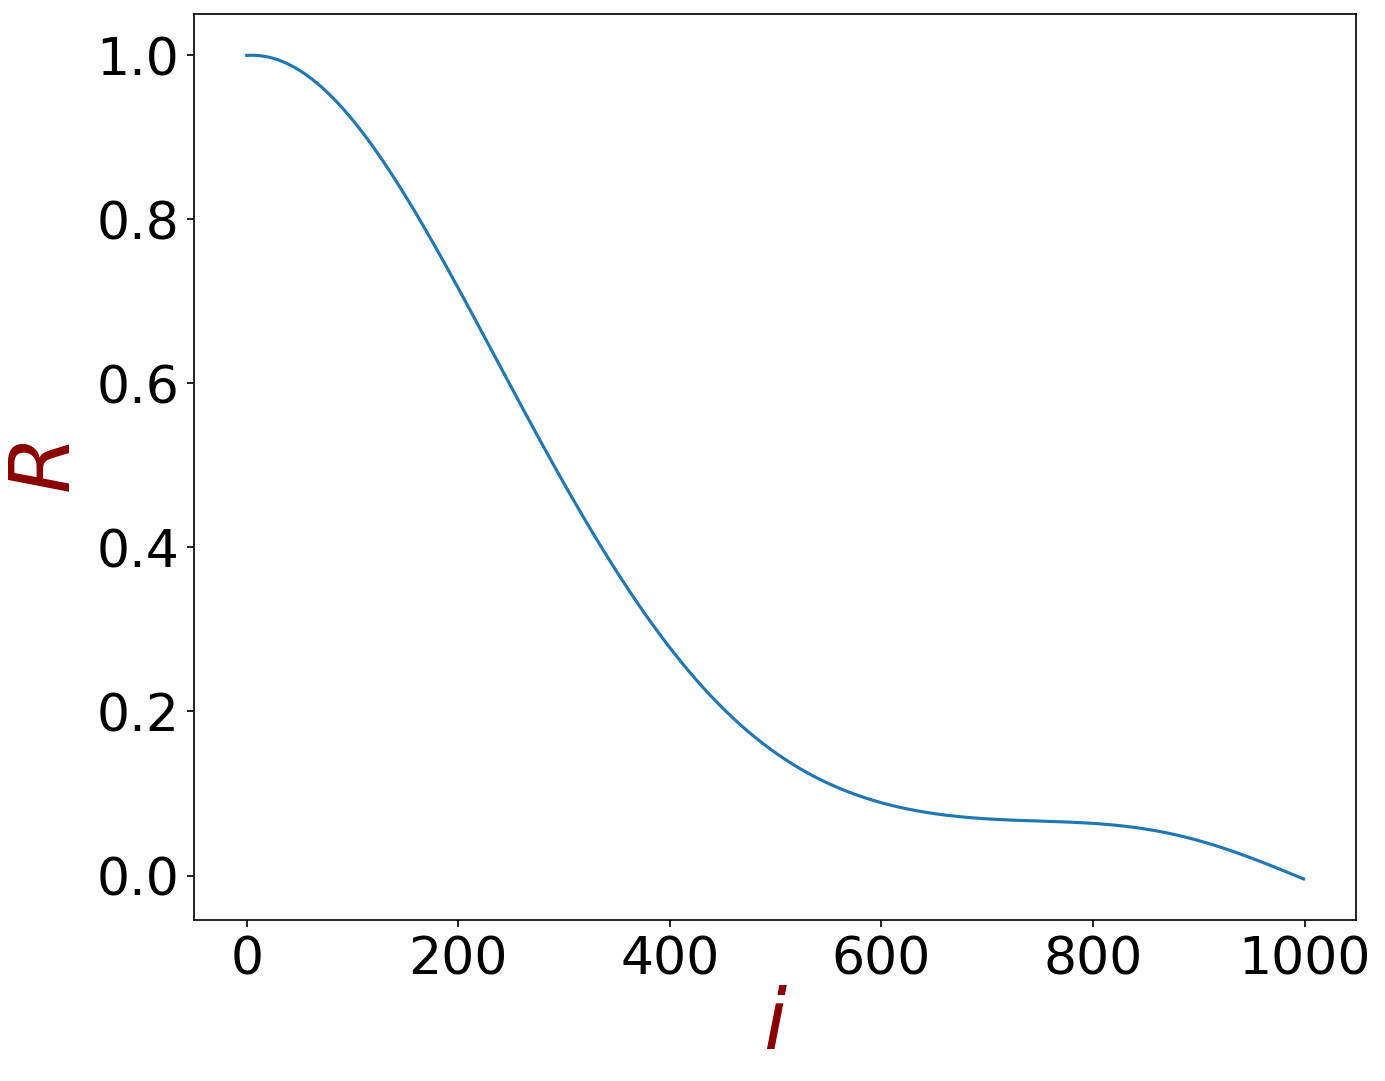

In [16]:
Mc = 1000
sx = np.mean(xt)
Vx = np.var(xt)

dxt = [xt[i] - sx for i in range(len(xt))]

R = []

for i in range(Mc):
    
    summ = 0
    
    for j in range(i, Nsteps):
        
        summ += dxt[j]*dxt[j - i + 1]
    R.append(summ / ((Nsteps + 1 - i) * Vx))

    
plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$i$', fontdict=font)
plt.ylabel('$R$', fontdict=font)
plt.tick_params(labelsize=lblsize)
plt.plot(R)
plt.show()

In [17]:
import nolds as nd


print(nd.lyap_e(xt))
print(nd.lyap_e(pt))

[ 0.00316108  0.00019859 -0.00032874 -0.00225591]
[ 0.0073084   0.00191255 -0.00148258 -0.0092815 ]


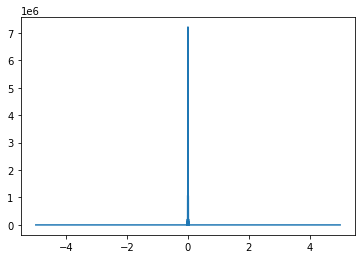

In [60]:
from __future__ import division

data = np.asarray(xt)
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 10
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

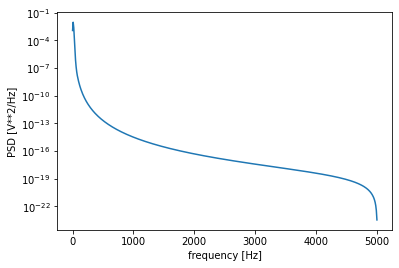

In [62]:
from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(1234)


fs = 10e3
N = 1e3
#amp = 2*np.sqrt(2)
#freq = 1234.0
#noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = np.asarray(xt)


f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [20]:
np.mean(Pxx_den[256:])

1.3622380032449648e-18

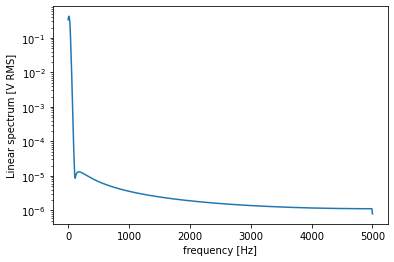

0.4242525354489558

In [21]:
#If we average the last half of the spectral density, to exclude the peak, 
    #we can recover the noise power on the signal.
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

np.sqrt(Pxx_spec.max())

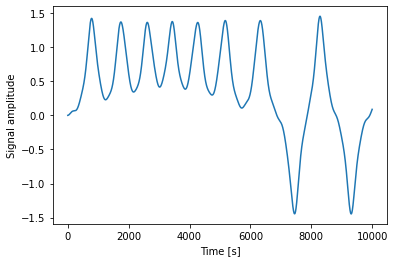

In [22]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 10  # Sampling rate, or number of measurements per second

t = np.arange(0, Nsteps + 1)
x = np.asarray(xt)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

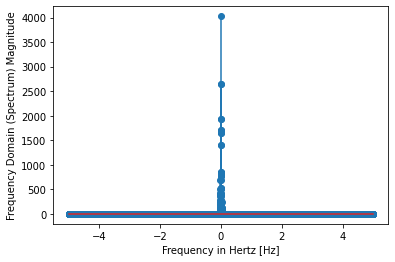

In [23]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

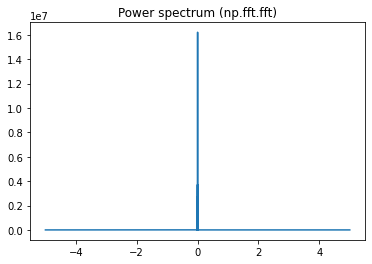

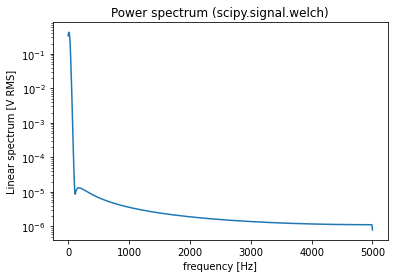

In [24]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(Nsteps) / fs
x = np.asarray(xt)


# np.fft.fft
time_step = 1 / 10
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(x))**2
plt.figure()
plt.plot(freqs[idx], ps[idx])
plt.title('Power spectrum (np.fft.fft)')

# signal.welch
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()

[2.21014249 0.10411958]


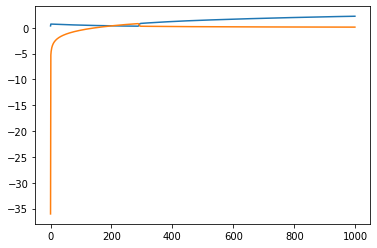

In [66]:
import numpy as np
from scipy.integrate import solve_ivp

#initial parameters
Ea = 0.1
Gamma = 0.0
Nu = 0.5
T = 1/Nu
NS = 300
dt = T/NS
k = -1

#ODE system
def func(t, v, Ea, Gama, Nu, k):
    p, x = v #unpack the variables
    return [Ea*np.cos(Nu*t) - Gamma*p - k*x - 3/4 * x**3, p]

#Jacobian matrix
def JM(v, Ea, Gama, Nu, k):
    p, x = [i for i in v]
    return np.array([[-k - 9/4 * x**2, 1], [0, 1]])

U = np.eye(2) #unit blob
v0 = [0, 1e-7] #initial condition
I3 = np.ones(2)
lyap = [] #empty list to store the lengths of the orthogonal axes

iters=10**3
dt=0.01
tf=iters * dt

#integrate the ODE system -- hopefully falls into an attractor
sol = solve_ivp(func, [0, tf], v0, t_eval=np.linspace(0, tf, iters), args=(Ea, Gamma, Nu, k))
v_n = sol.y.T #transpose the solution

#do this for each iteration
for k in range(0, iters):
    v0 = v_n[k] #new v0 after iteration
    U_n = np.matmul(I3+dt*JM(v0, Ea, Gamma, Nu, k), U)

    #do a Gram-Schmidt Orthogonalisation (GSO)
    Q, R = np.linalg.qr(U_n)
    lyap.append(np.log(abs(R.diagonal())))

    U = Q #new axes after iteration
    
[sum([lyap[k][j] for k in range(iters)]) / (dt * iters) for j in range(2)]
plt.plot(lyap)
print(lyap[-1])

In [ ]:
sol